In [1]:
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA, FastICA
from sklearn import manifold
from sklearn.manifold import TSNE, Isomap
from sklearn.preprocessing import MinMaxScaler

from umap import UMAP

C:\Users\weld.c\AppData\Roaming\Python\Python38\site-packages\umap\__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
# Loading the data file:
data = pd.read_excel('readcounts.xlsx')
data

,Unnamed: 0,H223,H224,H225,H226,H227,H228,H229,H230,H231,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
0,ENSG00000000003,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,2,0,0,1,0
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,...,980,932,360,450,484,926,803,630,537,582
3,ENSG00000000457,189,114,110,289,186,148,169,258,145,...,117,286,137,90,105,275,101,56,87,81
4,ENSG00000000460,74,38,55,127,30,17,45,100,33,...,28,157,34,20,15,139,54,25,21,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65210,ENSG00000281918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65211,ENSG00000281919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65212,ENSG00000281920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65213,ENSG00000281921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65215 entries, 0 to 65214
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  65215 non-null  object
 1   H223        65215 non-null  int64 
 2   H224        65215 non-null  int64 
 3   H225        65215 non-null  int64 
 4   H226        65215 non-null  int64 
 5   H227        65215 non-null  int64 
 6   H228        65215 non-null  int64 
 7   H229        65215 non-null  int64 
 8   H230        65215 non-null  int64 
 9   H231        65215 non-null  int64 
 10  H232        65215 non-null  int64 
 11  H233        65215 non-null  int64 
 12  H234        65215 non-null  int64 
 13  H235        65215 non-null  int64 
 14  H236        65215 non-null  int64 
 15  H237        65215 non-null  int64 
 16  H238        65215 non-null  int64 
 17  H239        65215 non-null  int64 
 18  H240        65215 non-null  int64 
 19  H241        65215 non-null  int64 
 20  H242  

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H223,65215.0,297.584666,3200.623699,0.0,0.0,0.0,7.0,405074.0
H224,65215.0,277.588806,2684.445184,0.0,0.0,0.0,7.0,264277.0
H225,65215.0,253.373089,2648.761188,0.0,0.0,0.0,6.0,311912.0
H226,65215.0,297.890869,2919.101933,0.0,0.0,0.0,8.0,360936.0
H227,65215.0,241.974515,4007.462138,0.0,0.0,0.0,4.0,451971.0
H228,65215.0,267.768397,4983.802048,0.0,0.0,0.0,4.0,699754.0
H229,65215.0,264.355823,4510.853390,0.0,0.0,0.0,5.0,588000.0
H230,65215.0,256.050050,2337.510610,0.0,0.0,0.0,7.0,230319.0
H231,65215.0,253.095975,3627.061502,0.0,0.0,0.0,4.0,461919.0
H232,65215.0,261.106264,5952.105399,0.0,0.0,0.0,3.0,944074.0


In [5]:
# Transposing the data:
columns = data.loc[:, 'Unnamed: 0'].values
data = data.drop(columns=['Unnamed: 0'])
data = data.transpose()
data.columns = columns
data

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
H223,0,0,1216,189,74,31895,2,763,8963,1589,...,0,0,0,0,0,0,0,0,0,0
H224,0,0,1228,114,38,23361,3,712,26794,1734,...,0,0,0,0,0,0,0,0,0,0
H225,0,0,1022,110,55,27944,0,956,8027,1341,...,0,0,0,0,0,0,0,0,0,0
H226,1,0,912,289,127,41846,6,1104,716,1053,...,0,0,0,0,0,0,0,0,0,0
H227,0,0,491,186,30,11929,14,136,745,730,...,0,0,0,0,0,0,0,0,0,0
H228,0,0,449,148,17,6856,16,227,3770,663,...,0,0,0,0,0,0,0,0,0,0
H229,0,0,466,169,45,6756,15,217,1260,669,...,0,0,0,0,0,0,0,0,0,0
H230,0,0,727,258,100,7668,4,905,1480,883,...,0,0,0,0,0,0,0,0,0,0
H231,1,0,774,145,33,9315,1,94,75,873,...,0,0,0,0,0,0,0,0,0,0
H232,0,0,576,131,8,3319,7,88,288,678,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, H223 to H270
Columns: 65215 entries, ENSG00000000003 to ENSG00000281922
dtypes: int64(65215)
memory usage: 23.9+ MB


In [7]:
data_descr = data.describe().transpose()
data_descr

,count,mean,std,min,25%,50%,75%,max
ENSG00000000003,48.0,0.250000,0.525924,0.0,0.00,0.0,0.0,2.0
ENSG00000000005,48.0,0.041667,0.201941,0.0,0.00,0.0,0.0,1.0
ENSG00000000419,48.0,709.125000,224.728453,318.0,540.75,686.0,884.0,1228.0
ENSG00000000457,48.0,136.395833,62.975760,56.0,90.00,114.5,157.0,289.0
ENSG00000000460,48.0,44.916667,35.518550,7.0,21.00,31.5,54.0,157.0
...,...,...,...,...,...,...,...,...
ENSG00000281918,48.0,0.041667,0.201941,0.0,0.00,0.0,0.0,1.0
ENSG00000281919,48.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
ENSG00000281920,48.0,0.020833,0.144338,0.0,0.00,0.0,0.0,1.0
ENSG00000281921,48.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


# Transformations:

In [8]:
x_array = data.loc[:, data.columns].values
x_array.shape

(48, 65215)

In [9]:
x_array = MinMaxScaler().fit_transform(x_array)
pd.DataFrame(x_array)

,0,1,2,3,4,5,6,7,8,9,...,65205,65206,65207,65208,65209,65210,65211,65212,65213,65214
0,0.0,0.0,0.986813,0.570815,0.446667,0.741714,0.105263,0.456349,0.222062,0.888117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.000000,0.248927,0.206667,0.520207,0.157895,0.422619,0.666359,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.773626,0.231760,0.320000,0.639162,0.000000,0.583995,0.198739,0.696759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.0,0.652747,1.000000,0.800000,1.000000,0.315789,0.681878,0.016570,0.474537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.190110,0.557940,0.153333,0.223480,0.736842,0.041667,0.017293,0.225309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.143956,0.394850,0.066667,0.091806,0.842105,0.101852,0.092667,0.173611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.162637,0.484979,0.253333,0.089210,0.789474,0.095238,0.030125,0.178241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.449451,0.866953,0.620000,0.112882,0.210526,0.550265,0.035607,0.343364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.5,0.0,0.501099,0.381974,0.173333,0.155631,0.052632,0.013889,0.000598,0.335648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.283516,0.321888,0.006667,0.000000,0.368421,0.009921,0.005905,0.185185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def plot_3d(x_array, title=''):
    fig = plt.figure(figsize=(10, 87))
    ax = fig.add_subplot(111, projection='3d')
    plt.title(title)
    ax.scatter(x_array[:, 0], x_array[:, 1], x_array[:, 2], alpha=0.5)

    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

    plt.tight_layout()
    plt.show()

In [11]:
# # PCA
# x_pca = PCA(n_components=3).fit_transform(x_array)
# plot_3d(x_pca, 'PCA')

In [12]:
# # TSNE
# x_tsne = TSNE(n_components=3).fit_transform(x_array)
# plot_3d(x_tsne, 'TSNE')

In [13]:
# # Isomap
# x_isomap = Isomap(n_components=3).fit_transform(x_array)
# plot_3d(x_isomap, 'Isomap')

In [14]:
n_components = 3
n_neighbors = 10

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding, n_neighbors=n_neighbors,
              n_components=n_components, eigen_solver='auto')

In [15]:
methods = OrderedDict()
methods['PCA'] = PCA(n_components=n_components)
methods['FastICA'] = PCA(n_components=n_components)
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
methods['MDS'] = manifold.MDS(n_components=n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)
methods['UMAP'] = UMAP(n_components=n_components, init='random', random_state=0)

PCA: 0.25 sec
FastICA: 0.22 sec
LLE: 0.4 sec
LTSA: 0.28 sec
Hessian LLE: 0.27 sec
Modified LLE: 0.34 sec
Isomap: 0.033 sec
MDS: 0.04 sec
SE: 0.035 sec
t-SNE: 0.69 sec
UMAP: 6.8 sec


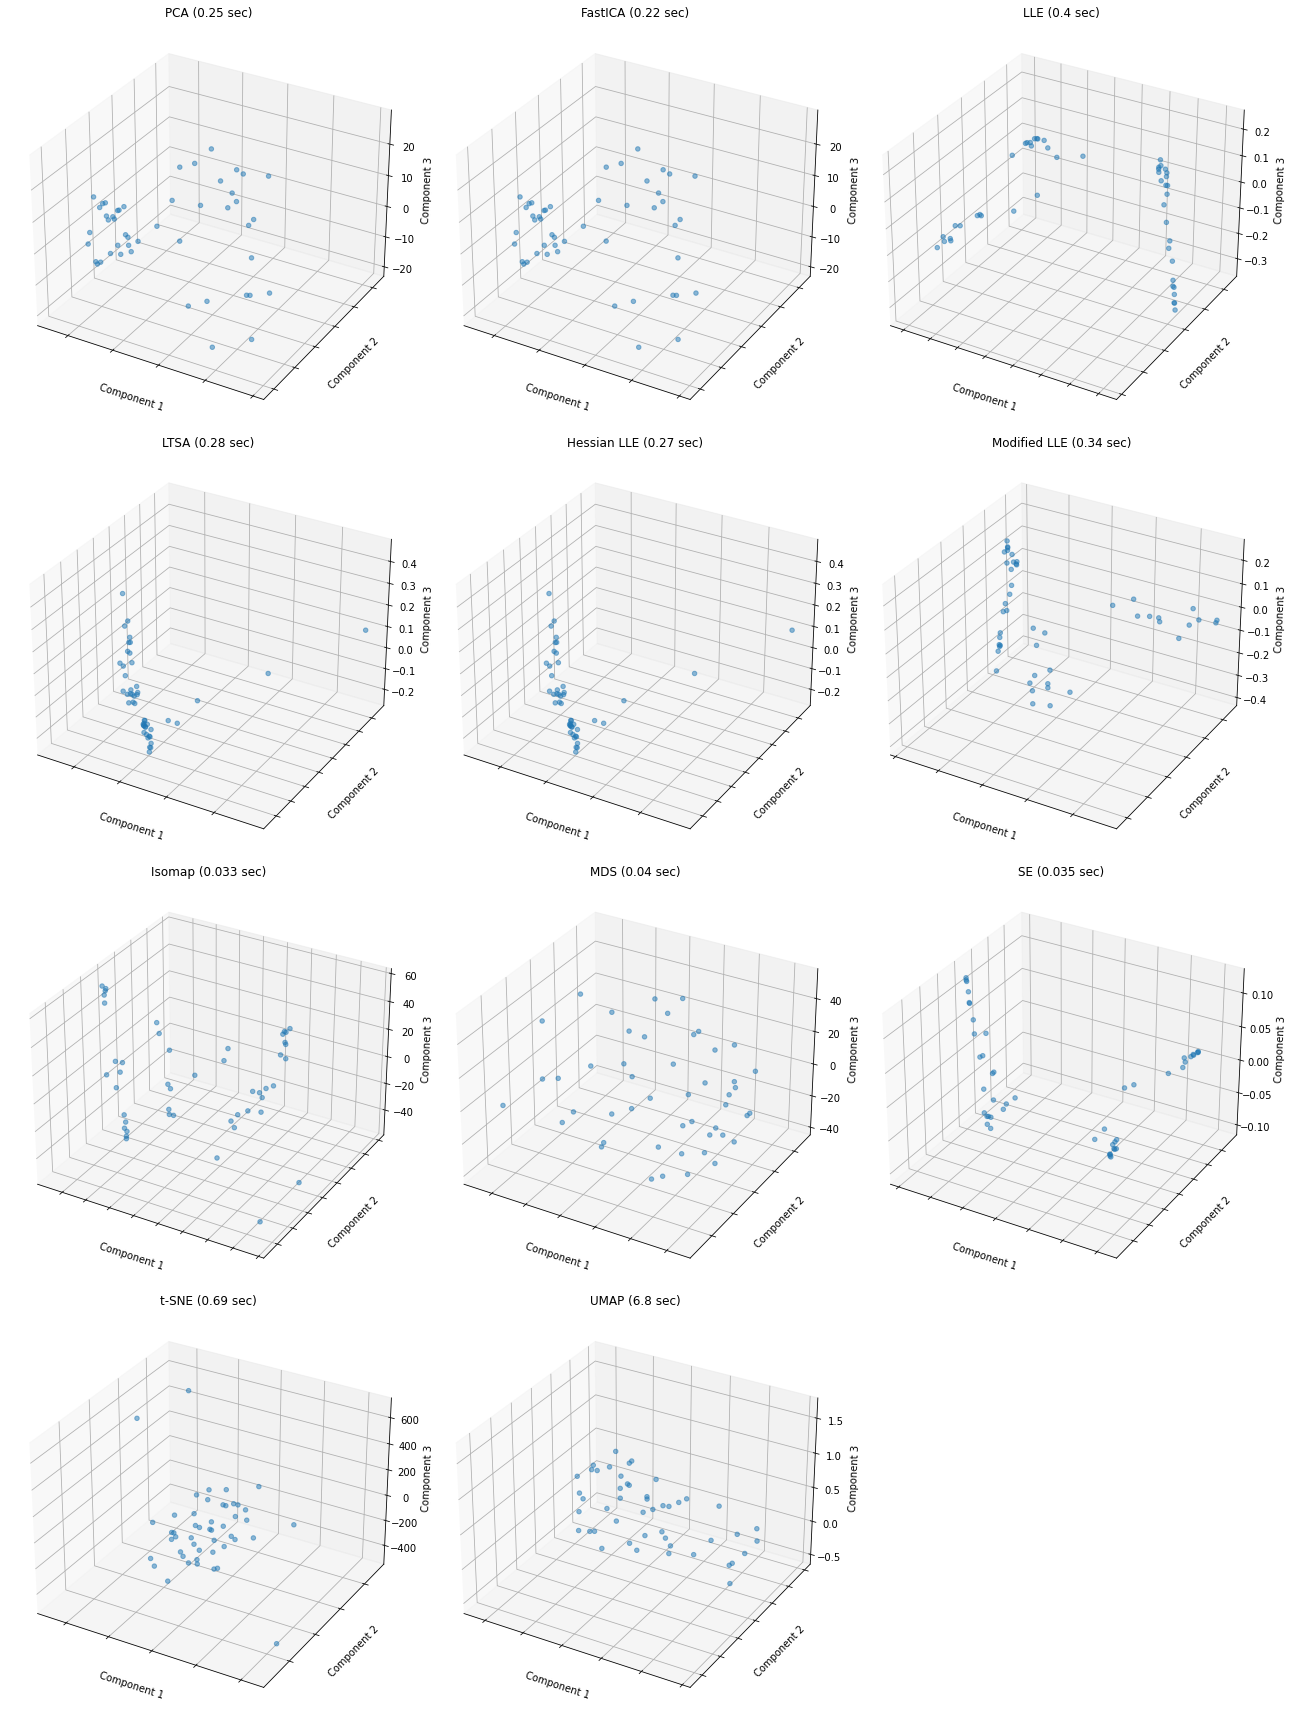

In [16]:
# Summary of all Ensemble methods:

fig = plt.figure(figsize=(18, 24))
# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    x_embedded = method.fit_transform(x_array)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    
    ax = fig.add_subplot(4, 3, i+1, projection='3d')
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.scatter(x_embedded[:, 0], x_embedded[:, 1], x_embedded[:, 2], alpha=0.5, cmap=plt.cm.Spectral)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.tight_layout()
plt.show()